In [2]:
import tensorflow as tf
from tensorflow.keras import models , layers
import matplotlib.pyplot as plt
from IPython.display import HTML
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [3]:
IMAGE_SIZE=256
CHANNELS=3

# train data
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=10,
    horizontal_flip=True
)

train_generator=train_datagen.flow_from_directory(
    'dataset/train',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=32,
    class_mode="sparse",
)

Found 1506 images belonging to 3 classes.


In [4]:
train_generator.class_indices


{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [5]:
class_names=list(train_generator.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [6]:
# validation data
validation_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=10,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=(0.8, 1.2),
    samplewise_center=False,
    zca_whitening=False,
    fill_mode='nearest'
)

validation_generator=validation_datagen.flow_from_directory(
    'dataset/val',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=32,
    class_mode="sparse",
    
)

Found 215 images belonging to 3 classes.


In [7]:
# test data
test_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=10,
    horizontal_flip=True
)

test_generator=test_datagen.flow_from_directory(
    'dataset/test',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=32,
    class_mode="sparse",
    save_to_dir=r'C:\Users\eradn\potato_disease\training\AugmentedImages'
)

Found 431 images belonging to 3 classes.


In [8]:
INPUT_SHAPE= (IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=3

model=models.Sequential([
    layers.Conv2D(32 , kernel_size = (3,3), activation='swish',input_shape=INPUT_SHAPE),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3) , activation='swish'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3) , activation='swish'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3) , activation='swish'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3) , activation='swish'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3) , activation='swish'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='swish'),
    layers.Dense(n_classes,activation='softmax'),
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 64)        0

In [10]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [11]:
history=model.fit(
    train_generator,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=21
)

Epoch 1/21
48/48 [==============================] - 144s 3s/step - loss: 0.8968 - accuracy: 0.5259 - val_loss: 0.7426 - val_accuracy: 0.7240
Epoch 2/21
48/48 [==============================] - 139s 3s/step - loss: 0.6458 - accuracy: 0.7390 - val_loss: 0.5873 - val_accuracy: 0.7396
Epoch 3/21
48/48 [==============================] - 141s 3s/step - loss: 0.5119 - accuracy: 0.7842 - val_loss: 0.5043 - val_accuracy: 0.7969
Epoch 4/21
48/48 [==============================] - 142s 3s/step - loss: 0.4192 - accuracy: 0.8413 - val_loss: 0.4614 - val_accuracy: 0.8177
Epoch 5/21
48/48 [==============================] - 143s 3s/step - loss: 0.3522 - accuracy: 0.8526 - val_loss: 0.3866 - val_accuracy: 0.8385
Epoch 6/21
48/48 [==============================] - 172s 4s/step - loss: 0.2739 - accuracy: 0.8904 - val_loss: 0.3900 - val_accuracy: 0.8281
Epoch 7/21
48/48 [==============================] - 161s 3s/step - loss: 0.2171 - accuracy: 0.9150 - val_loss: 0.2962 - val_accuracy: 0.8750
Epoch 8/21
48

In [26]:
scores=model.evaluate(test_generator)
scores=scores[np.argmax(scores)] *100
print("test accuracy: ",scores," %")

14/14 [==============================] - 26s 2s/step - loss: 0.0930 - accuracy: 0.9768
test accuracy:  97.67981171607971  %


In [27]:
history.params

{'verbose': 1, 'epochs': 21, 'steps': 48}

In [28]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

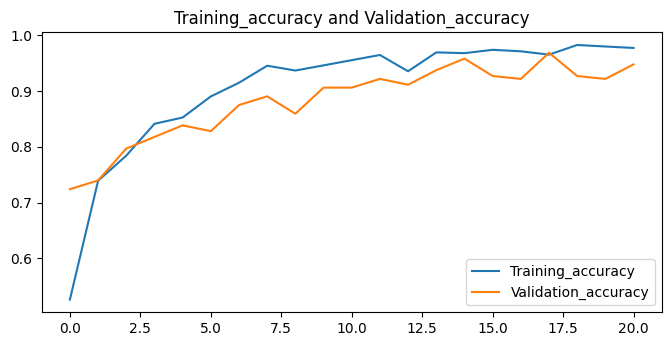

In [35]:
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
plt.plot(range(21), acc, label='Training_accuracy')
plt.plot(range(21), val_acc, label='Validation_accuracy')
plt.legend(loc='lower right')
plt.title('Training_accuracy and Validation_accuracy')
plt.savefig('graph1.png')



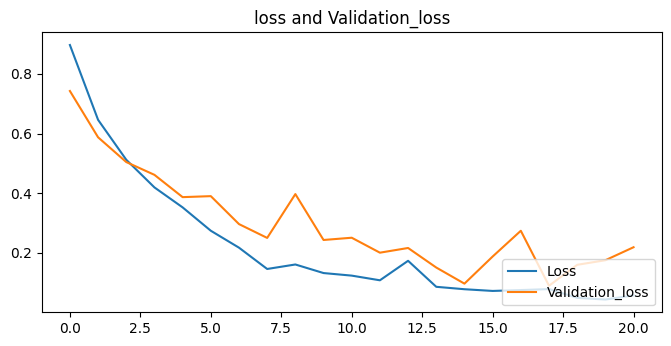

In [36]:
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
plt.plot(range(21), loss, label='Loss')
plt.plot(range(21), val_loss, label='Validation_loss')
plt.legend(loc='lower right')
plt.title('loss and Validation_loss')
plt.savefig('graph2.png')

Image to predict:


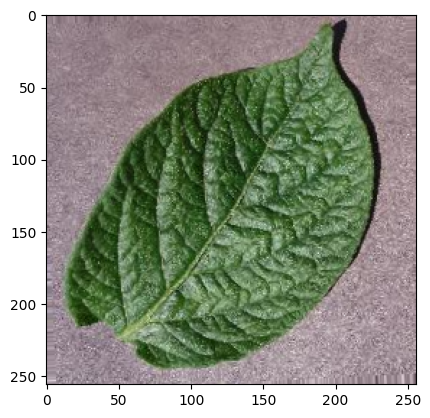

Image actual label: Potato___healthy
1/1 [==============================] - 1s 634ms/step
Image predicted label: Potato___healthy


In [31]:
# #Now we will make predictions on sample images
test_generator.reset()
images_batch , labels_batch=next(test_generator)
first_img = (images_batch[0]*255).astype('uint8')
first_label = labels_batch[0]
print('Image to predict:')
plt.imshow(first_img)
plt.show()
print('Image actual label:', class_names[int(first_label)])

batch_predictions = model.predict(images_batch)

predicted_label = np.argmax(batch_predictions[0])
print('Image predicted label:', class_names[predicted_label])

In [32]:
def predict(model,img):
    img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array=tf.expand_dims(img_array, 0) #batch

    predictions=model.predict(img_array)
    predicted_class=class_names[np.argmax(predictions[0])]
    confidence=100*(np.argmax(predictions[0]))
    return predicted_class , confidence

1/1 [==============================] - 1s 597ms/step


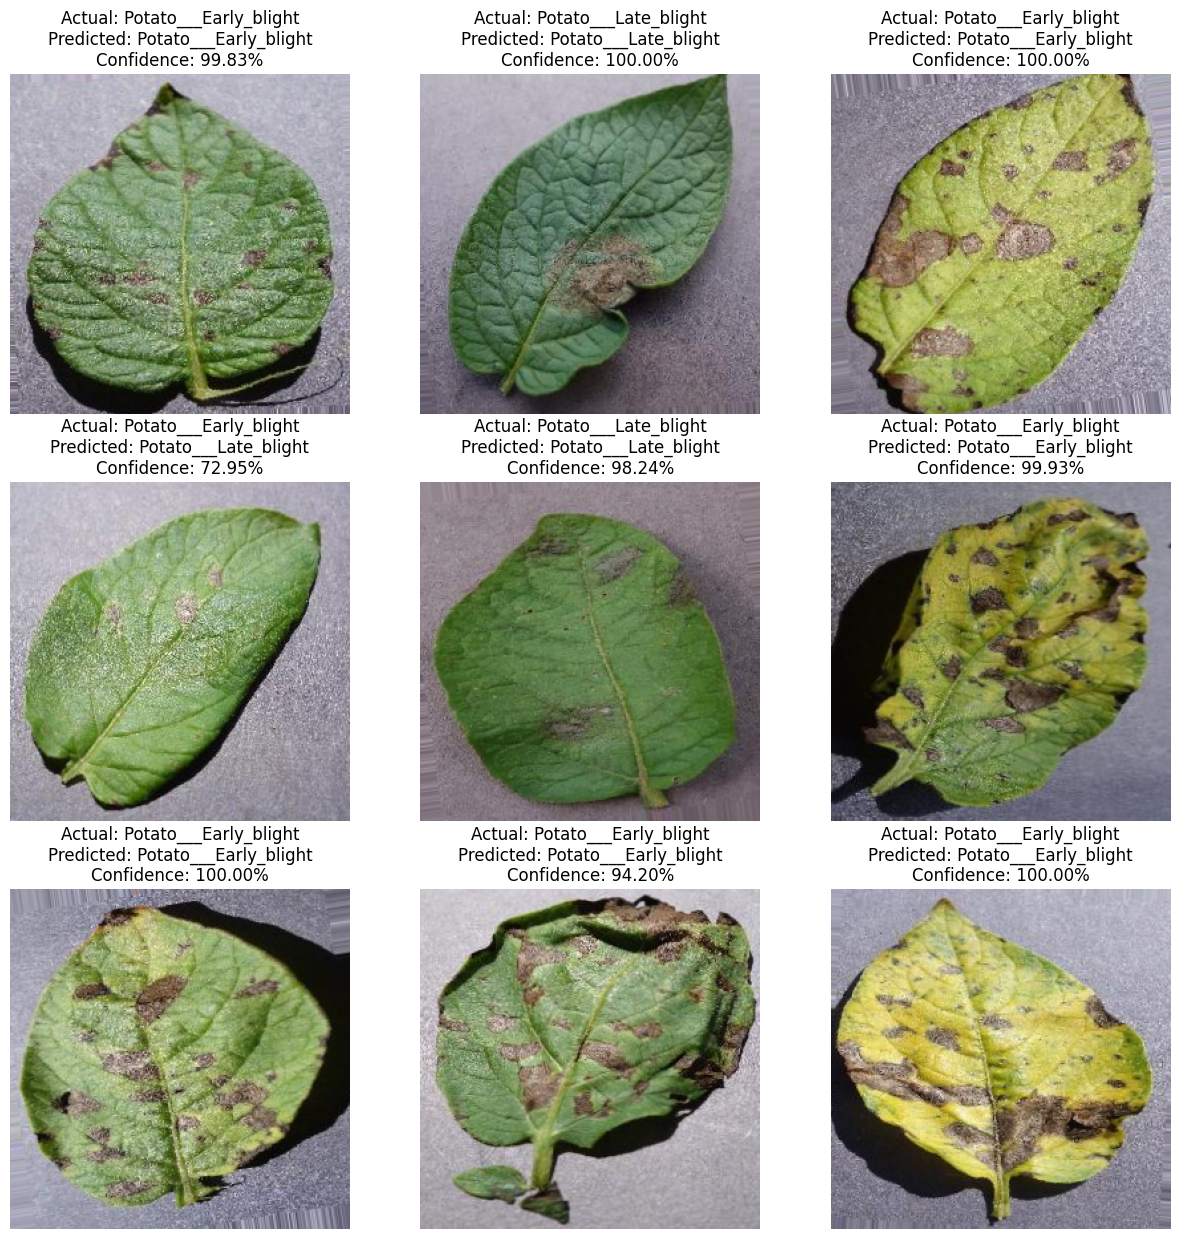

In [33]:
plt.figure(figsize=(15, 15))
images_batch, labels_batch=next(test_generator)
predictions = model.predict(images_batch)
for i in range(9):  # Assuming you want to display 9 images
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow((images_batch[i]*255).astype('uint8'))

    predicted_class = class_names[np.argmax(predictions[i])]
    confidence = np.max(predictions[i]) * 100  # Convert probability to percentage
    actual_class = class_names[int(labels_batch[i])]
    
    plt.title(f"Actual: {actual_class}\nPredicted: {predicted_class}\nConfidence: {confidence:.2f}%")
    plt.axis('off')
    plt.savefig('prediction1.png')

plt.show()



In [34]:
model_version=2.0
model.save(f"../saved_models/{model_version}")

INFO:tensorflow:Assets written to: ../saved_models/2.0\assets


INFO:tensorflow:Assets written to: ../saved_models/2.0\assets
